# FFT Analysis with NumPy

This notebook covers frequency domain analysis using NumPy's FFT (Fast Fourier Transform) module.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 4)

## 1. Introduction to the Fourier Transform

The Fourier Transform decomposes a signal into its frequency components. The FFT is an efficient algorithm for computing the Discrete Fourier Transform (DFT).

Key functions in `numpy.fft`:
- `fft()` - Compute the 1D FFT
- `ifft()` - Compute the inverse FFT
- `fftfreq()` - Get the frequency bins
- `rfft()` - FFT for real-valued input (returns only positive frequencies)
- `irfft()` - Inverse of rfft

In [2]:
def generate_sine_wave(frequency, amplitude=1.0, phase=0.0, duration=1.0, sample_rate=1000):
    """Generate a sine wave with specified parameters."""
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    y = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    return t, y

## 2. FFT of a Simple Sine Wave

Let's compute the FFT of a single-frequency sine wave.

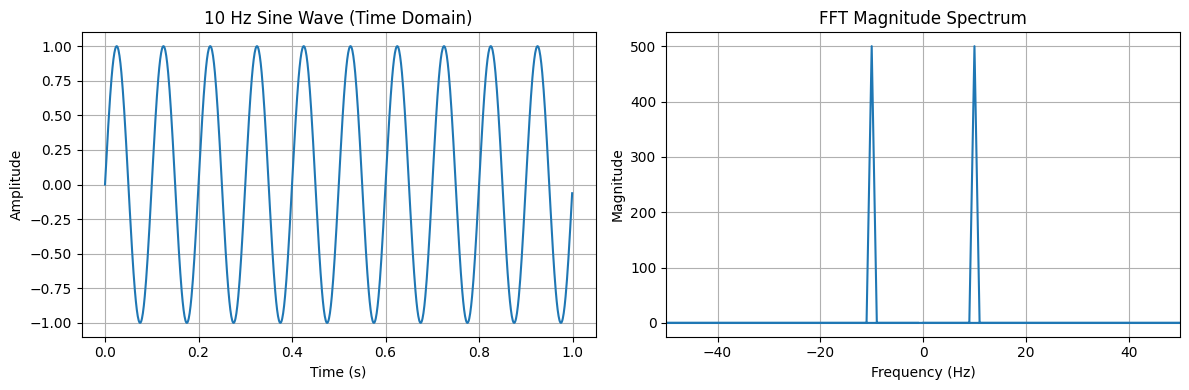

Peak at: 10.0 Hz


In [3]:
# Parameters
frequency = 10  # Hz
sample_rate = 1000  # samples per second
duration = 1.0  # seconds

# Generate signal
t, signal = generate_sine_wave(frequency=frequency, duration=duration, sample_rate=sample_rate)
n_samples = len(signal)

# Compute FFT
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n_samples, d=1/sample_rate)

# Magnitude spectrum (absolute value of complex FFT result)
magnitude = np.abs(fft_result)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(t, signal)
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].set_title(f'{frequency} Hz Sine Wave (Time Domain)')
axes[0].grid(True)

axes[1].plot(frequencies, magnitude)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Magnitude')
axes[1].set_title('FFT Magnitude Spectrum')
axes[1].set_xlim(-50, 50)
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Peak at: {frequencies[np.argmax(magnitude[:n_samples//2])]} Hz")

## 3. Understanding FFT Output

The FFT returns complex numbers. The magnitude tells us the strength of each frequency component, while the phase tells us the time offset.

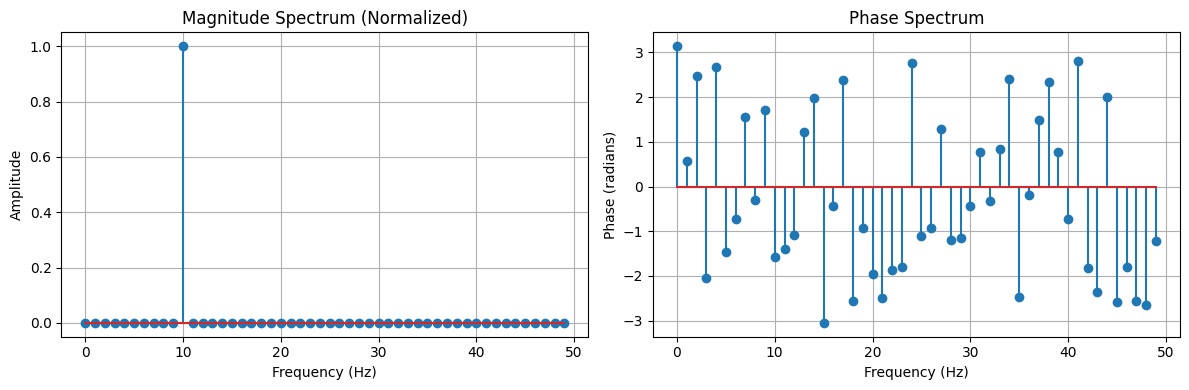

Peak frequency: 10.0 Hz
Peak amplitude (normalized): 1.000
Peak phase: -1.571 radians (-90.0 degrees)


In [4]:
# Using the same signal from above
magnitude = np.abs(fft_result)
phase = np.angle(fft_result)

# Normalize magnitude for easier interpretation
# Divide by N and multiply by 2 (for single-sided spectrum)
magnitude_normalized = magnitude / n_samples * 2

# Only look at positive frequencies
positive_freq_mask = frequencies >= 0

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].stem(frequencies[positive_freq_mask][:50], magnitude_normalized[positive_freq_mask][:50])
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Magnitude Spectrum (Normalized)')
axes[0].grid(True)

axes[1].stem(frequencies[positive_freq_mask][:50], phase[positive_freq_mask][:50])
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Phase (radians)')
axes[1].set_title('Phase Spectrum')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Find the peak
peak_idx = np.argmax(magnitude[:n_samples//2])
print(f"Peak frequency: {frequencies[peak_idx]:.1f} Hz")
print(f"Peak amplitude (normalized): {magnitude_normalized[peak_idx]:.3f}")
print(f"Peak phase: {phase[peak_idx]:.3f} radians ({np.degrees(phase[peak_idx]):.1f} degrees)")

## 4. The fftfreq Function

`np.fft.fftfreq(n, d)` returns the frequency bins for an FFT:
- `n` = number of samples
- `d` = sample spacing (1/sample_rate)

In [5]:
n = 8  # Small example
sample_rate = 100  # Hz
d = 1 / sample_rate

freqs = np.fft.fftfreq(n, d)
print(f"Number of samples: {n}")
print(f"Sample rate: {sample_rate} Hz")
print(f"Sample spacing: {d} s")
print(f"Frequency bins: {freqs}")
print(f"Nyquist frequency: {sample_rate/2} Hz")
print(f"\nNote: Negative frequencies represent the same information as positive frequencies")
print(f"      for real-valued signals (they are complex conjugates).")

Number of samples: 8
Sample rate: 100 Hz
Sample spacing: 0.01 s
Frequency bins: [  0.   12.5  25.   37.5 -50.  -37.5 -25.  -12.5]
Nyquist frequency: 50.0 Hz

Note: Negative frequencies represent the same information as positive frequencies
      for real-valued signals (they are complex conjugates).


## 5. Analyzing Composite Signals

The power of FFT: it can identify all frequency components in a complex signal.

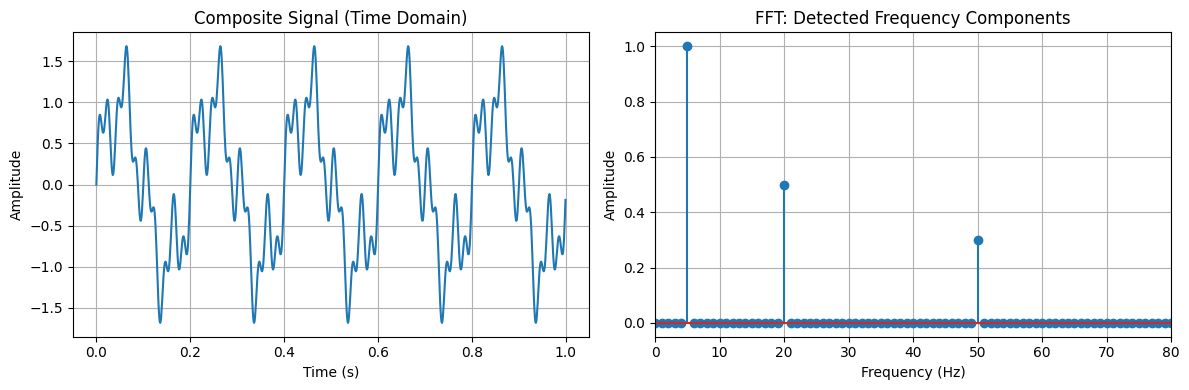

Detected frequencies and amplitudes:
  5.0 Hz, amplitude = 1.00
  20.0 Hz, amplitude = 0.50
  50.0 Hz, amplitude = 0.30


In [6]:
# Create a composite signal with multiple frequencies
sample_rate = 1000
duration = 1.0
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Three frequency components
f1, a1 = 5, 1.0    # 5 Hz, amplitude 1.0
f2, a2 = 20, 0.5   # 20 Hz, amplitude 0.5
f3, a3 = 50, 0.3   # 50 Hz, amplitude 0.3

signal = (a1 * np.sin(2 * np.pi * f1 * t) + 
          a2 * np.sin(2 * np.pi * f2 * t) + 
          a3 * np.sin(2 * np.pi * f3 * t))

# Compute FFT
n_samples = len(signal)
fft_result = np.fft.fft(signal)
frequencies = np.fft.fftfreq(n_samples, d=1/sample_rate)
magnitude = np.abs(fft_result) / n_samples * 2

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(t, signal)
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Composite Signal (Time Domain)')
axes[0].grid(True)

# Plot only positive frequencies
pos_mask = frequencies >= 0
axes[1].stem(frequencies[pos_mask], magnitude[pos_mask])
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Amplitude')
axes[1].set_title('FFT: Detected Frequency Components')
axes[1].set_xlim(0, 80)
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Find peaks
threshold = 0.1
peak_indices = np.where((magnitude[pos_mask] > threshold))[0]
print("Detected frequencies and amplitudes:")
for idx in peak_indices:
    print(f"  {frequencies[idx]:.1f} Hz, amplitude = {magnitude[idx]:.2f}")

## 6. Using rfft for Real-Valued Signals

For real-valued signals, `rfft` is more efficient. It only returns the positive frequency components (since negative frequencies are redundant for real signals).

Full FFT output length: 1000
rfft output length: 501
rfft is ~2.0x smaller


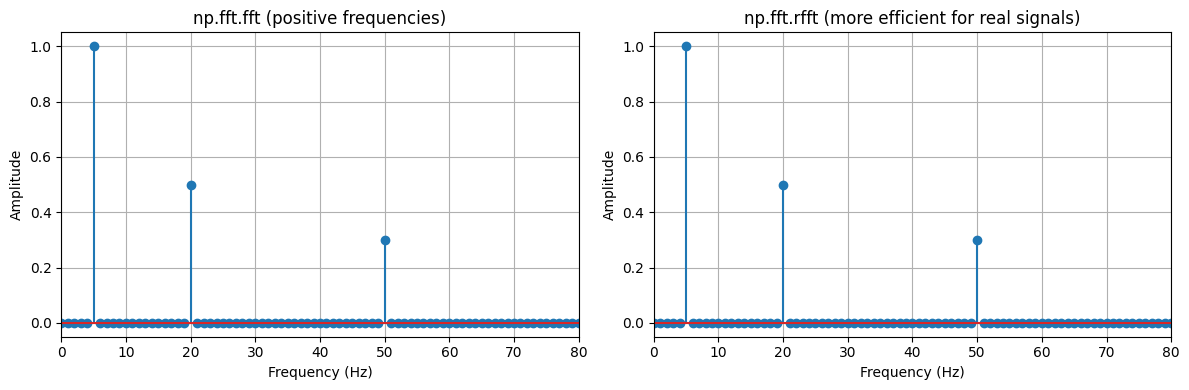

In [7]:
# Same composite signal
rfft_result = np.fft.rfft(signal)
rfft_frequencies = np.fft.rfftfreq(n_samples, d=1/sample_rate)
rfft_magnitude = np.abs(rfft_result) / n_samples * 2

print(f"Full FFT output length: {len(fft_result)}")
print(f"rfft output length: {len(rfft_result)}")
print(f"rfft is ~{len(fft_result) / len(rfft_result):.1f}x smaller")

# Plot comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].stem(frequencies[pos_mask], magnitude[pos_mask])
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('np.fft.fft (positive frequencies)')
axes[0].set_xlim(0, 80)
axes[0].grid(True)

axes[1].stem(rfft_frequencies, rfft_magnitude)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Amplitude')
axes[1].set_title('np.fft.rfft (more efficient for real signals)')
axes[1].set_xlim(0, 80)
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 7. Inverse FFT: Reconstructing Signals

We can reconstruct the original signal from its FFT using the inverse FFT.

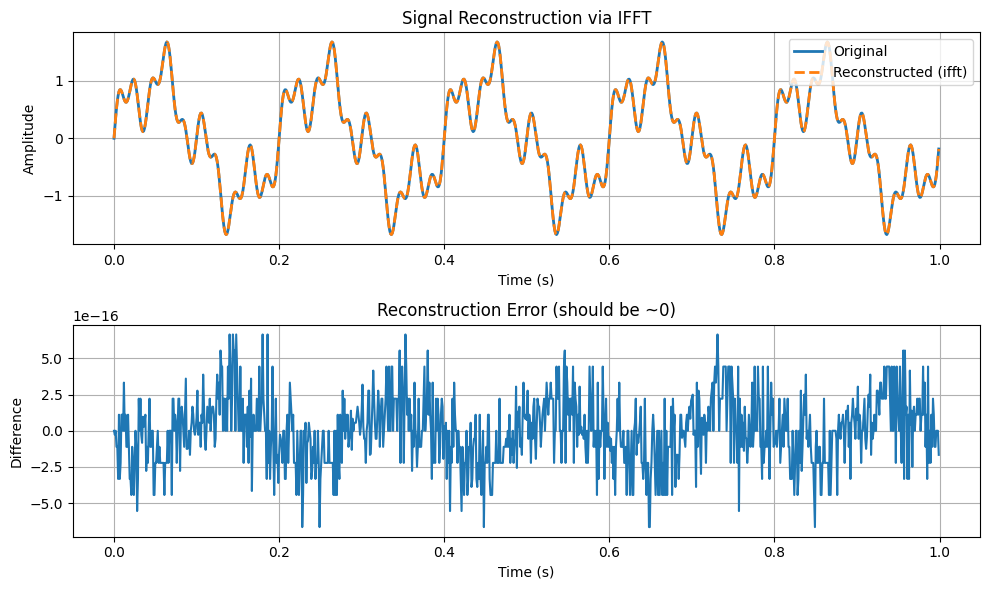

Max reconstruction error (ifft): 6.66e-16
Max reconstruction error (irfft): 1.33e-15


In [8]:
# Reconstruct from fft
reconstructed = np.fft.ifft(fft_result)

# Reconstruct from rfft
reconstructed_rfft = np.fft.irfft(rfft_result)

# Verify reconstruction
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

axes[0].plot(t, signal, label='Original', linewidth=2)
axes[0].plot(t, reconstructed.real, '--', label='Reconstructed (ifft)', linewidth=2)
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Signal Reconstruction via IFFT')
axes[0].legend()
axes[0].grid(True)

# Show the difference
axes[1].plot(t, signal - reconstructed.real)
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Difference')
axes[1].set_title('Reconstruction Error (should be ~0)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Max reconstruction error (ifft): {np.max(np.abs(signal - reconstructed.real)):.2e}")
print(f"Max reconstruction error (irfft): {np.max(np.abs(signal - reconstructed_rfft)):.2e}")

## 8. FFT with Different Signal Lengths

The frequency resolution of the FFT depends on the signal duration:
- Frequency resolution = 1 / duration = sample_rate / n_samples

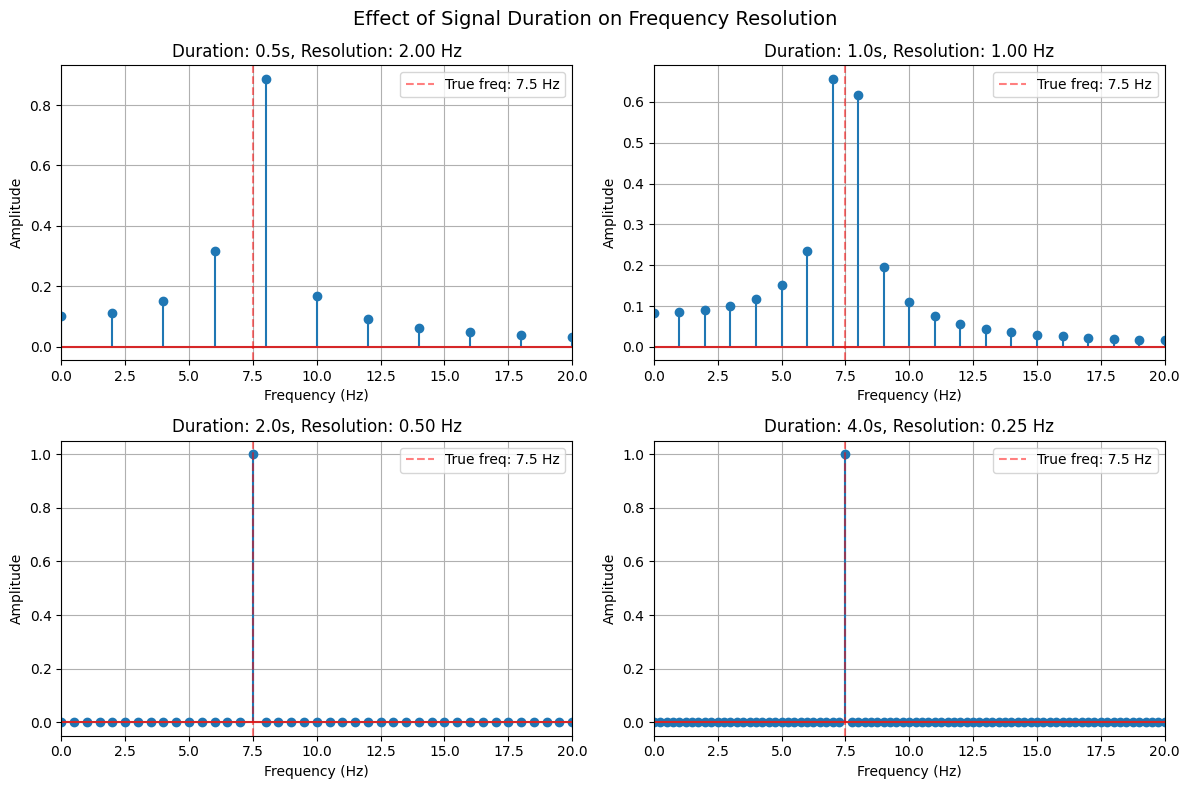

In [9]:
frequency = 7.5  # Hz - not an integer!
sample_rate = 100

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, duration in zip(axes.flat, [0.5, 1.0, 2.0, 4.0]):
    t, signal = generate_sine_wave(frequency=frequency, duration=duration, sample_rate=sample_rate)
    n_samples = len(signal)
    
    fft_result = np.fft.rfft(signal)
    frequencies = np.fft.rfftfreq(n_samples, d=1/sample_rate)
    magnitude = np.abs(fft_result) / n_samples * 2
    
    freq_resolution = sample_rate / n_samples
    
    ax.stem(frequencies, magnitude)
    ax.axvline(x=frequency, color='r', linestyle='--', alpha=0.5, label=f'True freq: {frequency} Hz')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Duration: {duration}s, Resolution: {freq_resolution:.2f} Hz')
    ax.set_xlim(0, 20)
    ax.legend()
    ax.grid(True)

plt.suptitle('Effect of Signal Duration on Frequency Resolution', fontsize=14)
plt.tight_layout()
plt.show()

## 9. Power Spectral Density

The Power Spectral Density (PSD) shows the distribution of power across frequencies.

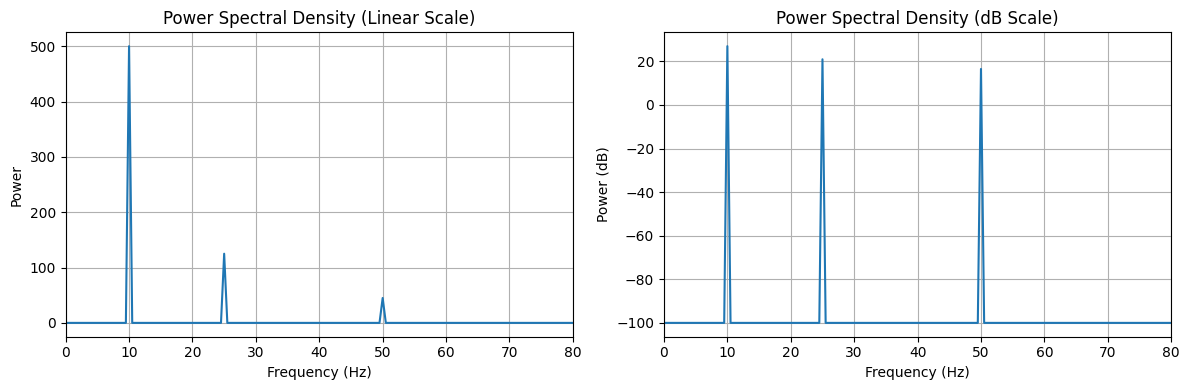

In [10]:
# Create a signal with multiple components
sample_rate = 1000
duration = 2.0
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

signal = (1.0 * np.sin(2 * np.pi * 10 * t) + 
          0.5 * np.sin(2 * np.pi * 25 * t) + 
          0.3 * np.sin(2 * np.pi * 50 * t))

# Compute FFT
n_samples = len(signal)
fft_result = np.fft.rfft(signal)
frequencies = np.fft.rfftfreq(n_samples, d=1/sample_rate)

# Power spectral density: |FFT|^2 / N
psd = (np.abs(fft_result) ** 2) / n_samples

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(frequencies, psd)
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Power')
axes[0].set_title('Power Spectral Density (Linear Scale)')
axes[0].set_xlim(0, 80)
axes[0].grid(True)

# Often shown in dB
psd_db = 10 * np.log10(psd + 1e-10)  # Add small value to avoid log(0)
axes[1].plot(frequencies, psd_db)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Power (dB)')
axes[1].set_title('Power Spectral Density (dB Scale)')
axes[1].set_xlim(0, 80)
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Summary

In this notebook, we covered:
- Computing the FFT with `np.fft.fft()`
- Interpreting magnitude and phase spectra
- Using `fftfreq()` to get frequency bins
- Analyzing signals with multiple frequency components
- Using `rfft()` for efficient analysis of real-valued signals
- Reconstructing signals with inverse FFT
- Understanding frequency resolution
- Power spectral density

Next, in **03_practical_applications.ipynb**, we'll explore real-world applications including noise filtering and windowing.